# Análisis de Datos

* **Estadísticas descriptivas**: Calcular estadísticas descriptivas básicas para cada columna, como el promedio, la mediana, el máximo, el mínimo y la desviación estándar. Esto nos dará una idea de la distribución de nuestros datos.

* **Visualización de datos**: Crear gráficos y visualizaciones para explorar la distribución de los datos y detectar posibles patrones o anomalías como datos atípicos.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os, sys


root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
data_path = os.path.join(root_path, 'data')


In [2]:
df = pd.read_csv(os.path.join(data_path, 'processed', 'curated.csv'), encoding='utf-8')

In [3]:
df.head()

,año,mes,subtipo_de_delito,modalidad,mes-año,incidencias,codigo_lugar
0,2015,enero,Robo a casa habitación,Con violencia,2015-01,4,1001-1
1,2015,febrero,Robo a casa habitación,Con violencia,2015-02,3,1001-1
2,2015,marzo,Robo a casa habitación,Con violencia,2015-03,0,1001-1
3,2015,abril,Robo a casa habitación,Con violencia,2015-04,7,1001-1
4,2015,mayo,Robo a casa habitación,Con violencia,2015-05,4,1001-1


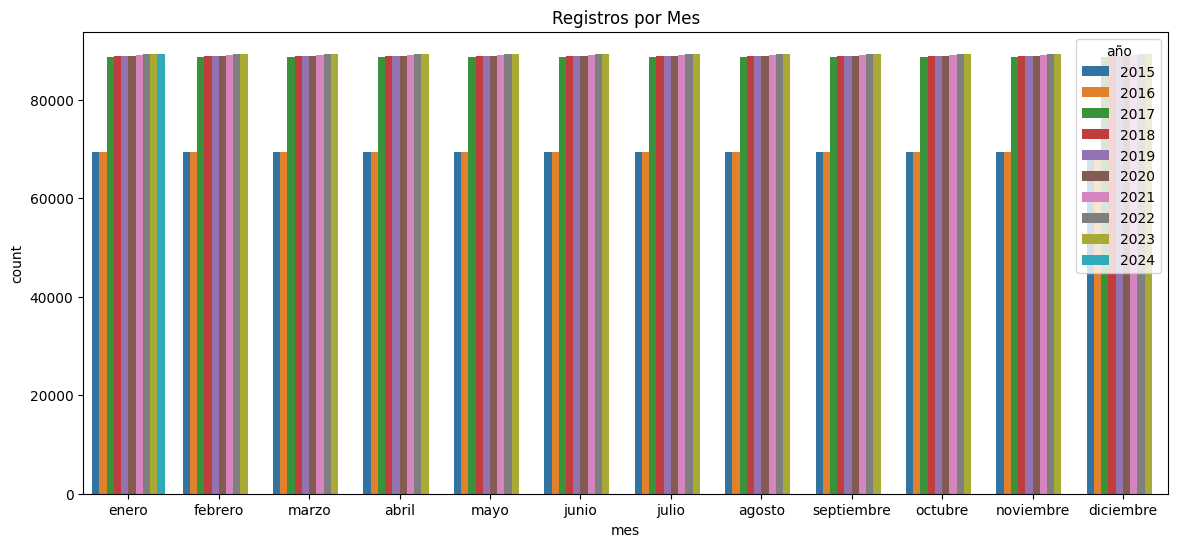

In [4]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='mes', hue='año', palette = sns.color_palette("tab10"))
ax.set(title='Registros por Mes')
plt.show()

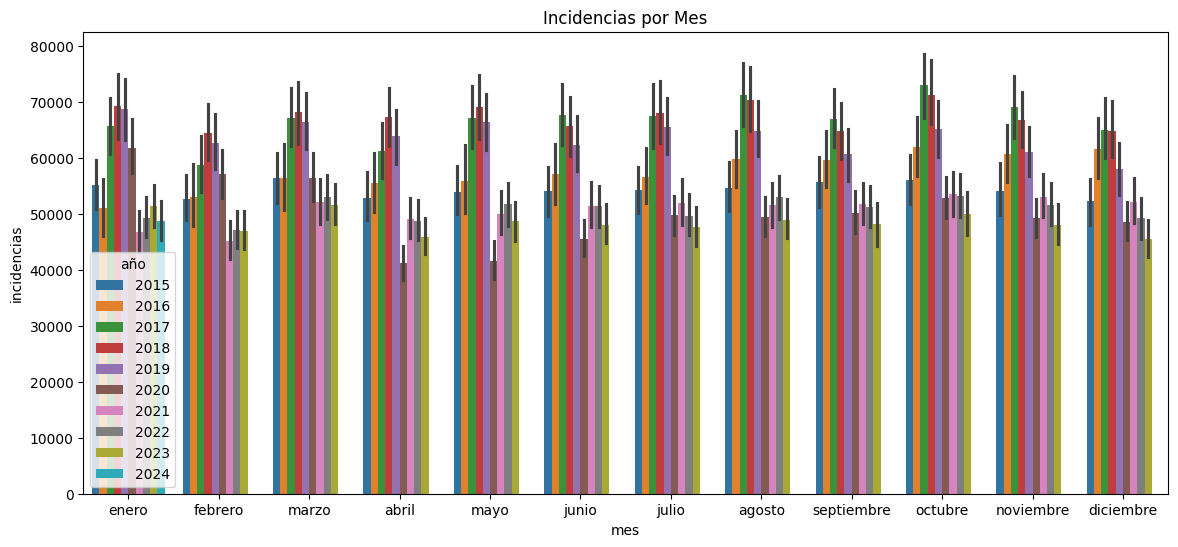

In [5]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df, x='mes',y='incidencias', estimator='sum', hue='año', palette = sns.color_palette("tab10"))
ax.set(title='Incidencias por Mes')
plt.show()

Los datos parecen estar bien distribuidos en el tiempo. Los patrones de incidencias de cada mes por todos los años son muy similares. El número de registros nos muestra lo que ya sabemos: en 2015 tenemos algunos meses con menos datos, y del 2024 solamente tenemos información de enero. Podemos observar, además, que entre el año 2017 y 2019 el número de delitos aumentó significativamente, sin embargo luego parece estar disminuyendo.

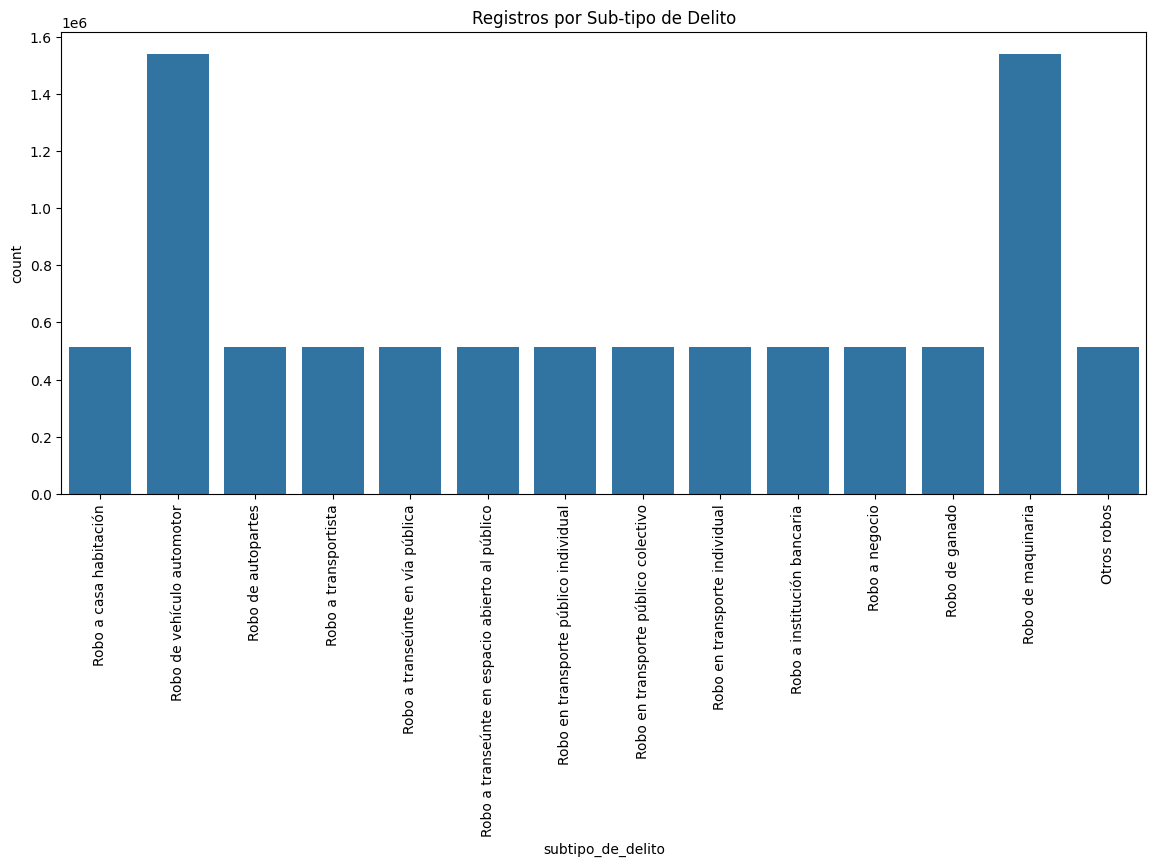

In [8]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='subtipo_de_delito')
ax.set(title='Registros por Sub-tipo de Delito')
ax.tick_params(axis='x', rotation=90)
plt.show()

Acá sucede como en las entidades, sin emabargo quiero investigar por qué hay un diferencia tan significativa en los subdelitos de robo de maquinaria y de vehiculos. 

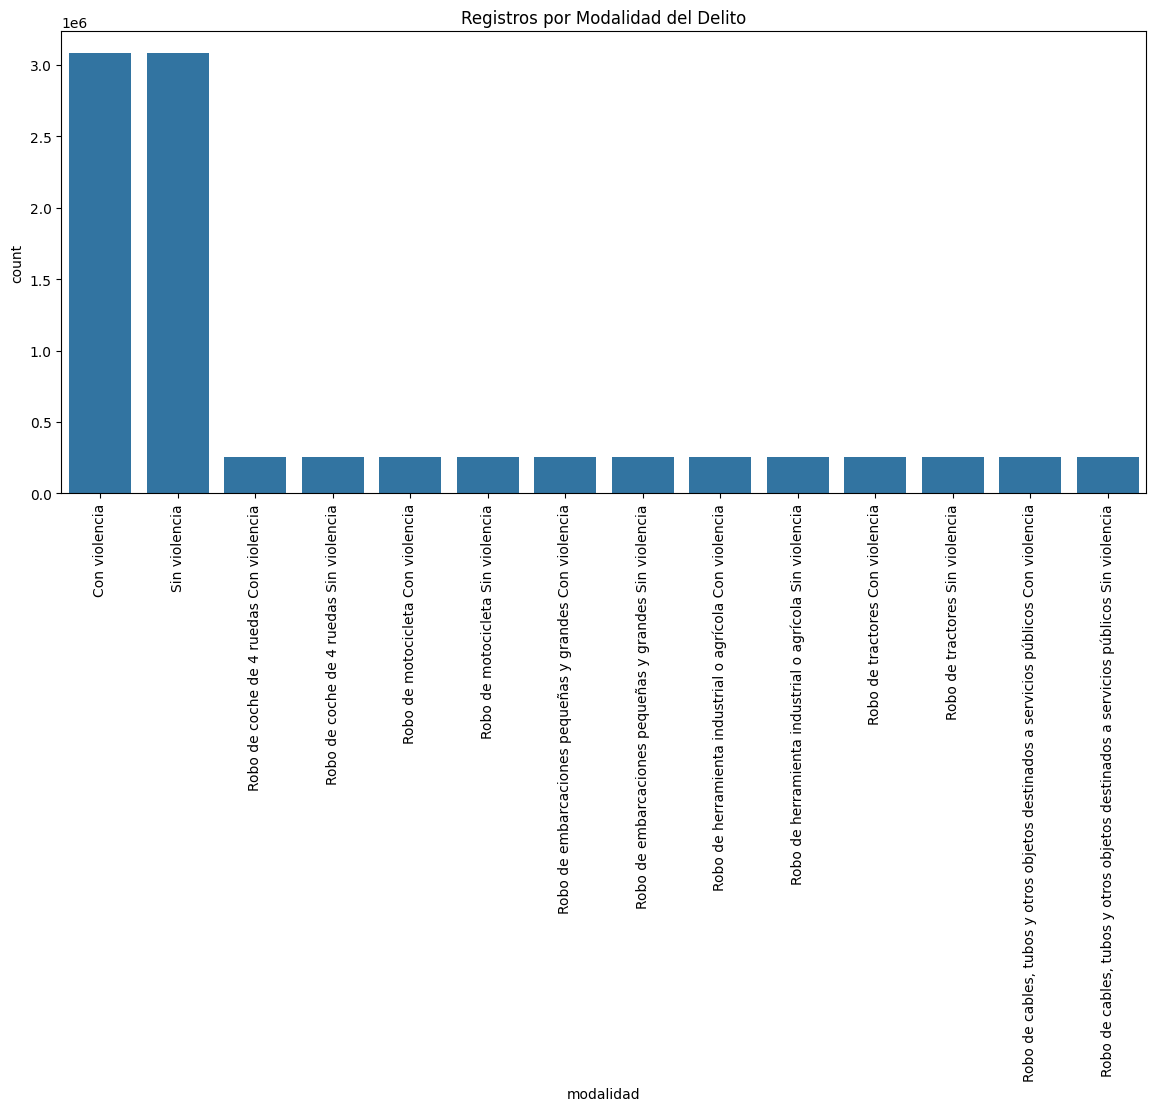

In [9]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='modalidad')
ax.set(title='Registros por Modalidad del Delito')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [13]:
df.groupby(by=['subtipo_de_delito']).agg(
    count = ('modalidad', 'nunique'),
    unique = ('modalidad', 'unique'))

,count,unique
subtipo_de_delito,,
Otros robos,2,"[Con violencia, Sin violencia]"
Robo a casa habitación,2,"[Con violencia, Sin violencia]"
Robo a institución bancaria,2,"[Con violencia, Sin violencia]"
Robo a negocio,2,"[Con violencia, Sin violencia]"
Robo a transeúnte en espacio abierto al público,2,"[Con violencia, Sin violencia]"
Robo a transeúnte en vía pública,2,"[Con violencia, Sin violencia]"
Robo a transportista,2,"[Con violencia, Sin violencia]"
Robo de autopartes,2,"[Con violencia, Sin violencia]"
Robo de ganado,2,"[Con violencia, Sin violencia]"


Para todos los casos, excepto para los subtipos de delitos 'Robo de maquinaria' y 'Robo de vehículo automotor', los valores para la modalidad son 'Con violencia' o 'Sin violencia'. Notemos que esta clasificación se encuentra en los últimos caracteres.

Aquí surge la pregunta... ¿Desagregamos las categorías de subtipos de delitos para 'Robo de maquinaria' y 'Robo de vehículo automotor' en sus valores distintos o los mantenemos y únicamente modificamos la modalidad?

In [14]:
temp_df = df.copy()
temp_df.loc[temp_df['subtipo_de_delito'] == 'Robo de maquinaria', 'subtipo_de_delito'] = temp_df.loc[temp_df['subtipo_de_delito'] == 'Robo de maquinaria', 'modalidad'].apply(lambda x: x[:-13])
temp_df.loc[temp_df['subtipo_de_delito'] == 'Robo de vehículo automotor', 'subtipo_de_delito'] = temp_df.loc[temp_df['subtipo_de_delito'] == 'Robo de vehículo automotor', 'modalidad'].apply(lambda x: x[:-13])
temp_df.modalidad = temp_df.modalidad.apply(lambda x: x[-13:])

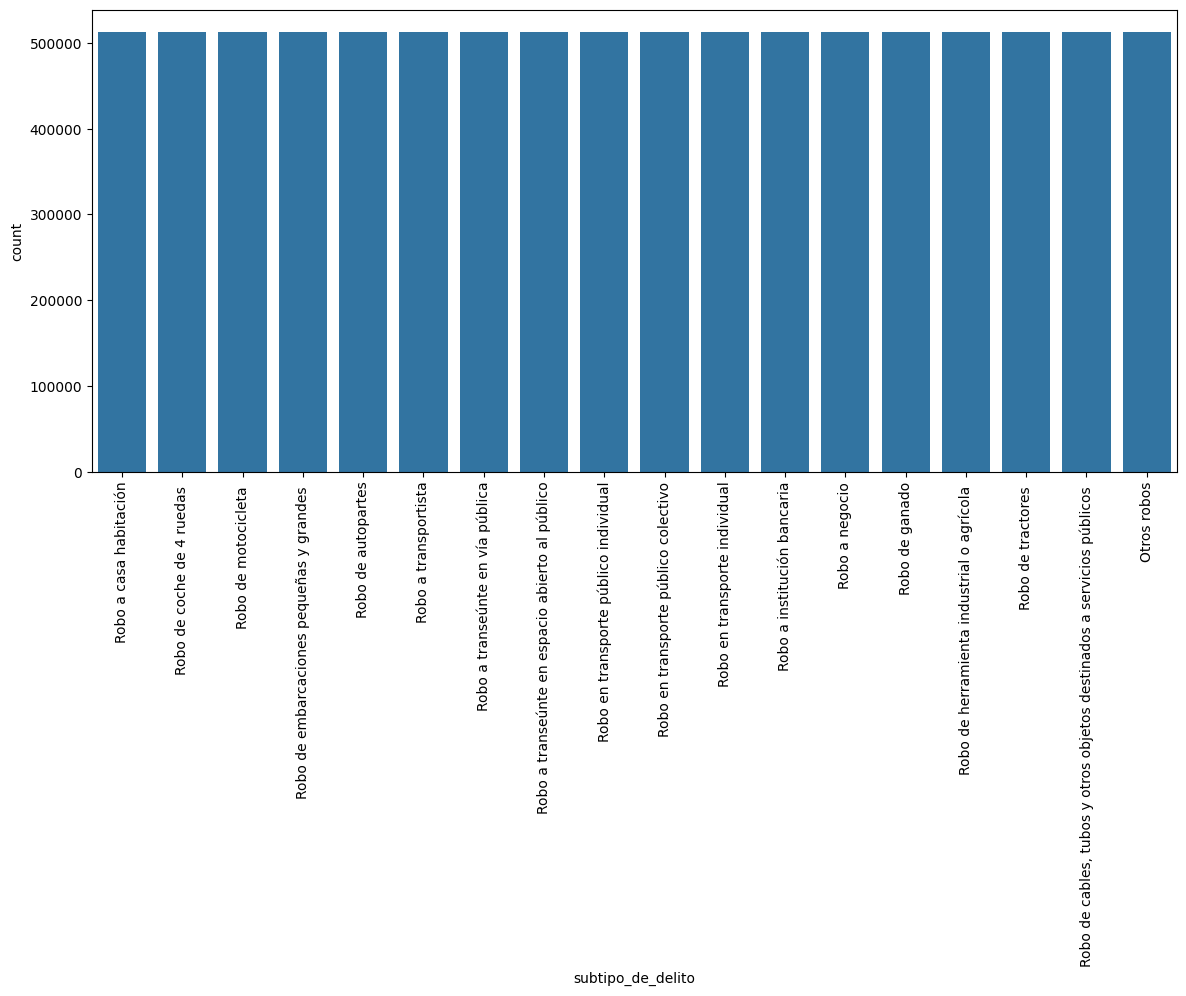

In [15]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=temp_df, x='subtipo_de_delito')
ax.tick_params(axis='x', rotation=90)
plt.show()

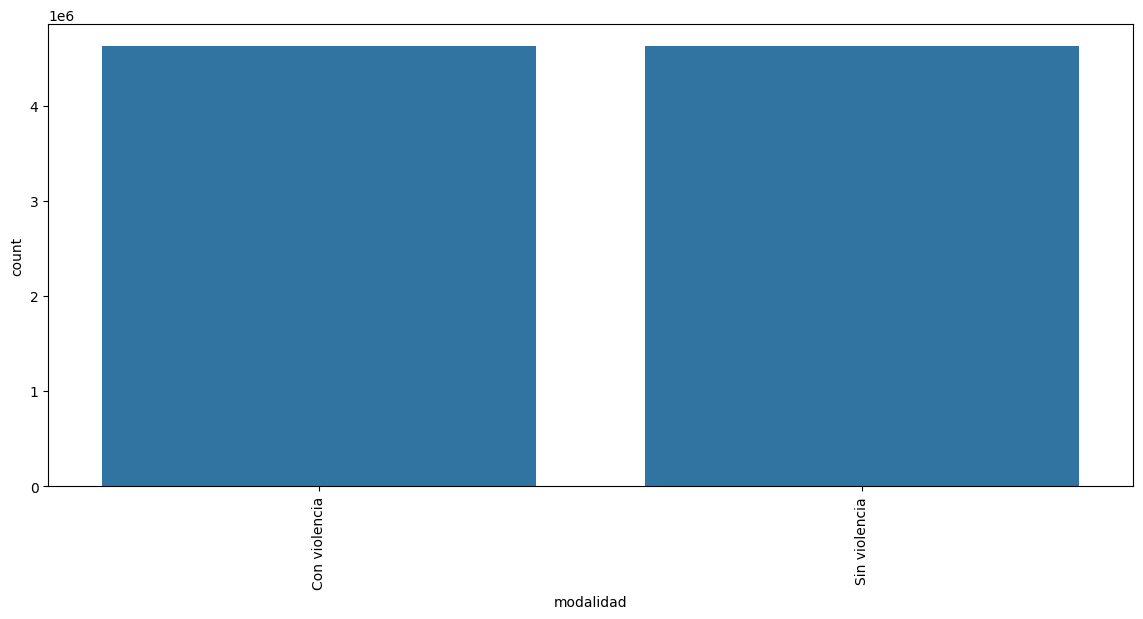

In [16]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=temp_df, x='modalidad')
ax.tick_params(axis='x', rotation=90)
plt.show()

Tras la transformación que realizamos, los datos para modalidad y subtipo de delito se ven mucho mejor distribuidos en cuanto al número de registros. Vamos a conservar esta transformación.

In [17]:
df.loc[df['subtipo_de_delito'] == 'Robo de maquinaria', 'subtipo_de_delito'] = df.loc[df['subtipo_de_delito'] == 'Robo de maquinaria', 'modalidad'].apply(lambda x: x[:-13])
df.loc[df['subtipo_de_delito'] == 'Robo de vehículo automotor', 'subtipo_de_delito'] = df.loc[df['subtipo_de_delito'] == 'Robo de vehículo automotor', 'modalidad'].apply(lambda x: x[:-13])
df.modalidad = df.modalidad.apply(lambda x: x[-13:])

In [18]:
df.head()

,año,mes,subtipo_de_delito,modalidad,mes-año,incidencias,codigo_lugar
0,2015,enero,Robo a casa habitación,Con violencia,2015-01,4,1001-1
1,2015,febrero,Robo a casa habitación,Con violencia,2015-02,3,1001-1
2,2015,marzo,Robo a casa habitación,Con violencia,2015-03,0,1001-1
3,2015,abril,Robo a casa habitación,Con violencia,2015-04,7,1001-1
4,2015,mayo,Robo a casa habitación,Con violencia,2015-05,4,1001-1


El dato de modalidad, ya sea 'Con violencia' o 'Sin violencia', realmente no aporta nada a la pregunta que estamos tratando de resolver.

In [19]:
df.drop(columns=['modalidad'], inplace=True)
df.head()

,año,mes,subtipo_de_delito,mes-año,incidencias,codigo_lugar
0,2015,enero,Robo a casa habitación,2015-01,4,1001-1
1,2015,febrero,Robo a casa habitación,2015-02,3,1001-1
2,2015,marzo,Robo a casa habitación,2015-03,0,1001-1
3,2015,abril,Robo a casa habitación,2015-04,7,1001-1
4,2015,mayo,Robo a casa habitación,2015-05,4,1001-1


C:\Users\morfa\AppData\Local\Temp\ipykernel_22960\1050019455.py:2: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df, x='subtipo_de_delito',y='incidencias', estimator='sum', hue='mes', palette = sns.color_palette("tab10"))


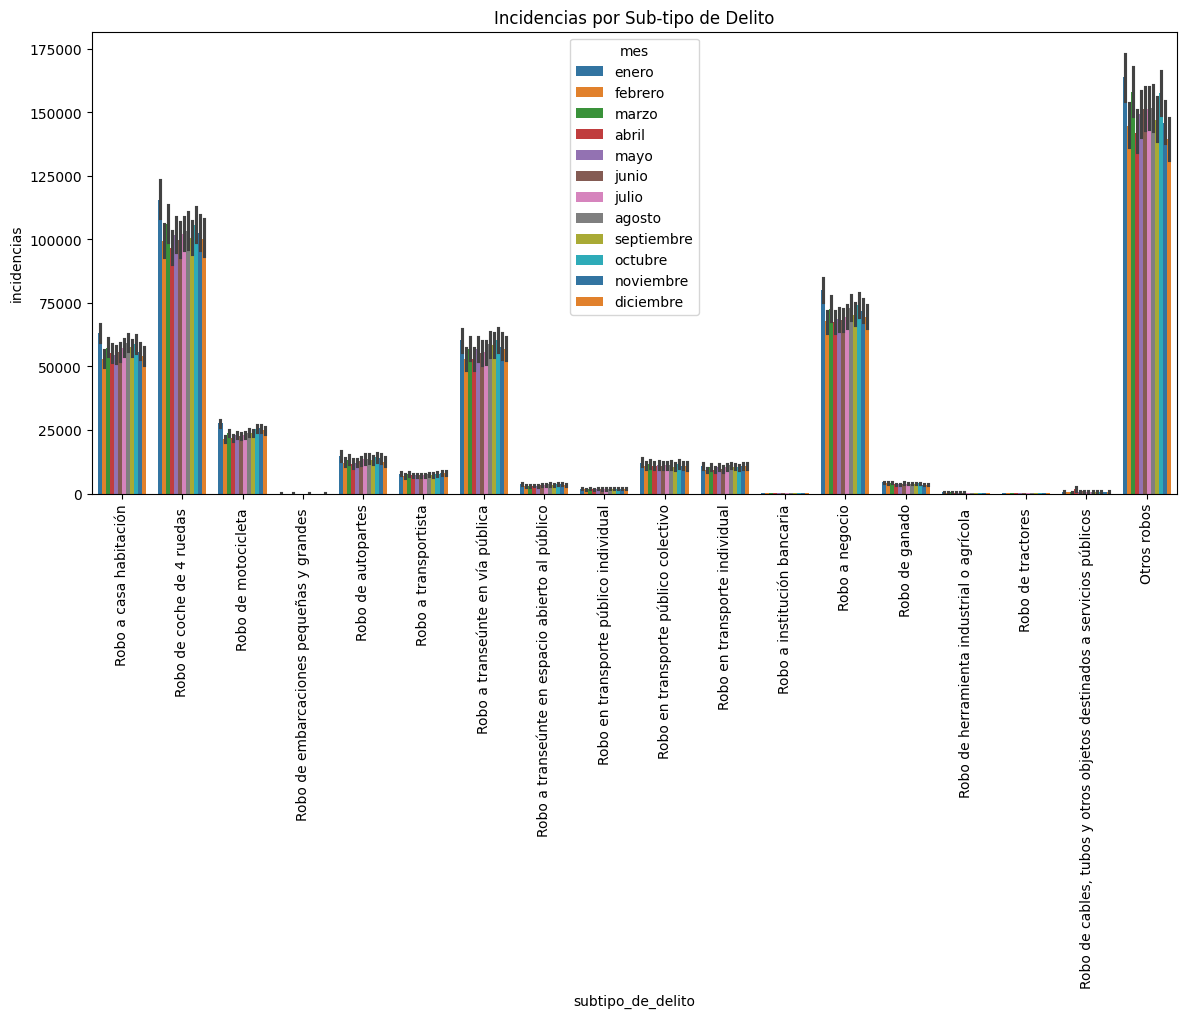

In [20]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df, x='subtipo_de_delito',y='incidencias', estimator='sum', hue='mes', palette = sns.color_palette("tab10"))
ax.set(title='Incidencias por Sub-tipo de Delito')
ax.tick_params(axis='x', rotation=90)
plt.show()



Voy a realizar algunas pruebas para checar si un enfoque de series de tiempo podría tener sentido, primero voy a procesar los datos para faciltar su manejo.

In [21]:
df_old = df.copy()

In [22]:
#df = df_old

In [23]:
df.head()

,año,mes,subtipo_de_delito,mes-año,incidencias,codigo_lugar
0,2015,enero,Robo a casa habitación,2015-01,4,1001-1
1,2015,febrero,Robo a casa habitación,2015-02,3,1001-1
2,2015,marzo,Robo a casa habitación,2015-03,0,1001-1
3,2015,abril,Robo a casa habitación,2015-04,7,1001-1
4,2015,mayo,Robo a casa habitación,2015-05,4,1001-1


In [25]:
df.codigo_lugar.nunique()

2483

In [28]:
subtipo_dict = {
    subtipo : f'R-{id}' for id, subtipo in enumerate(df.subtipo_de_delito.unique())
}
subtipo_dict
df.subtipo_de_delito = df.subtipo_de_delito.apply(lambda x: subtipo_dict.get(x))
df.head()

,año,mes,subtipo_de_delito,mes-año,incidencias,codigo_lugar
0,2015,enero,R-0,2015-01,4,1001-1
1,2015,febrero,R-0,2015-02,3,1001-1
2,2015,marzo,R-0,2015-03,0,1001-1
3,2015,abril,R-0,2015-04,7,1001-1
4,2015,mayo,R-0,2015-05,4,1001-1


In [30]:
df.insert(0, 'date', pd.to_datetime(df['mes-año']).dt.date)
df.drop(columns=['año', 'mes', 'mes-año'], inplace=True)

In [31]:
df.head()

,date,subtipo_de_delito,incidencias,codigo_lugar
0,2015-01-01,R-0,4,1001-1
1,2015-02-01,R-0,3,1001-1
2,2015-03-01,R-0,0,1001-1
3,2015-04-01,R-0,7,1001-1
4,2015-05-01,R-0,4,1001-1


In [32]:
print('Fecha Min: %s' % df['date'].min())
print('Fecha Max: %s' % df['date'].max())

Fecha Min: 2015-01-01
Fecha Max: 2024-01-01


In [34]:
incidencias_diarias      = df.groupby('date', as_index=False)['incidencias'].sum()
incidencias_diarias_loc  = df.groupby(['codigo_lugar', 'date'], as_index=False)['incidencias'].sum()
incidencias_diarias_tipo = df.groupby(['subtipo_de_delito', 'date'], as_index=False)['incidencias'].sum()

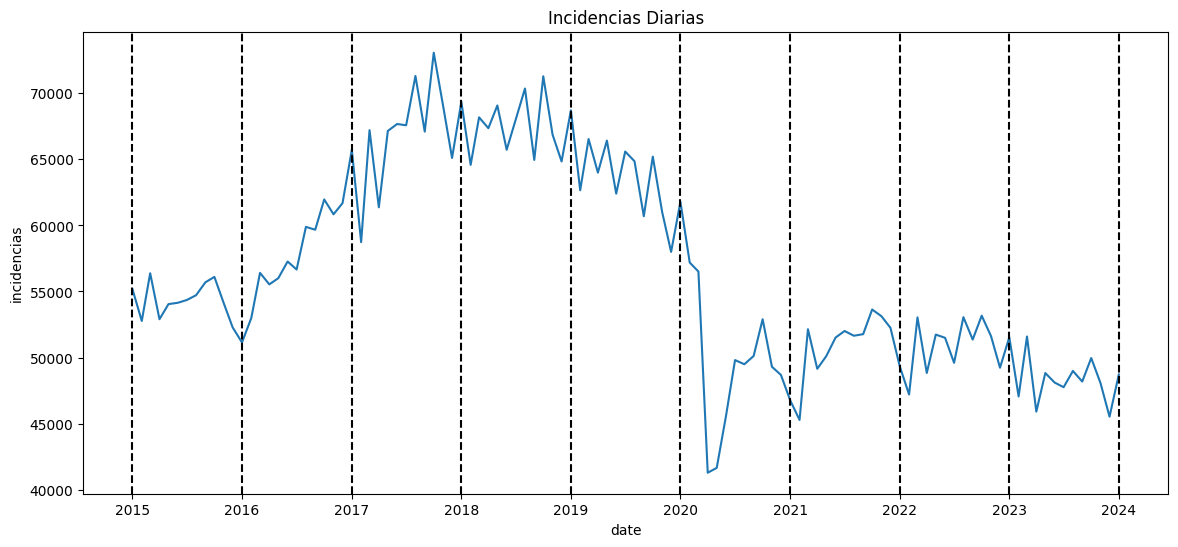

In [35]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=incidencias_diarias, x = 'date', y = 'incidencias')
ax.set(title='Incidencias Diarias')
ticks = ax.get_xticks()

for xc in ticks[1:]:
    plt.axvline(x=xc, color='black', linestyle='--')

plt.show()

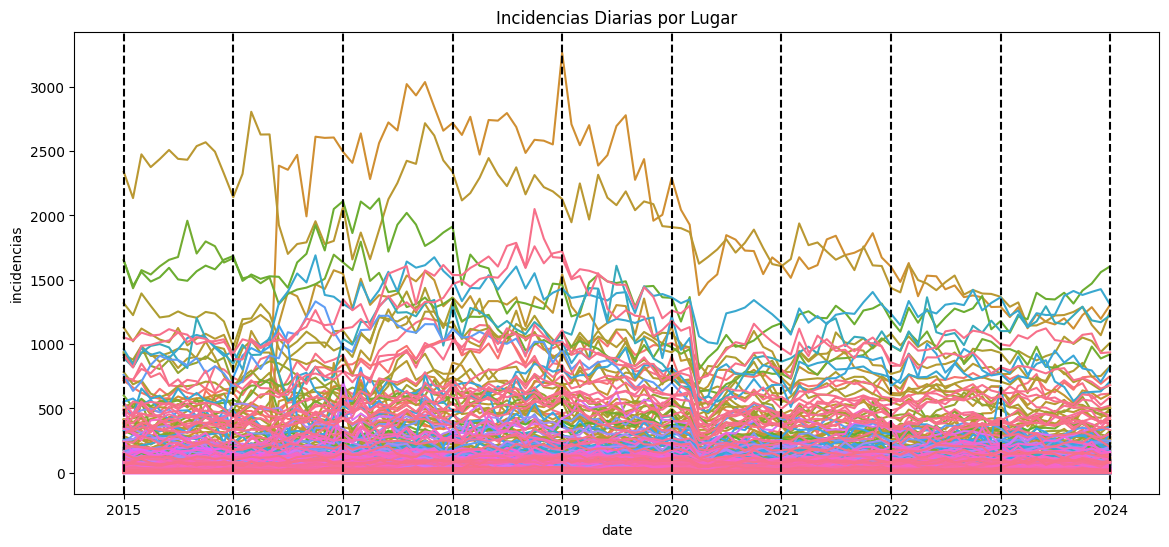

In [40]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=incidencias_diarias_loc, x = 'date', y = 'incidencias', hue='codigo_lugar')
ax.set(title='Incidencias Diarias por Lugar')
ax.get_legend().remove()
ticks = ax.get_xticks()

for xc in ticks[1:]:
    plt.axvline(x=xc, color='black', linestyle='--')

plt.show()

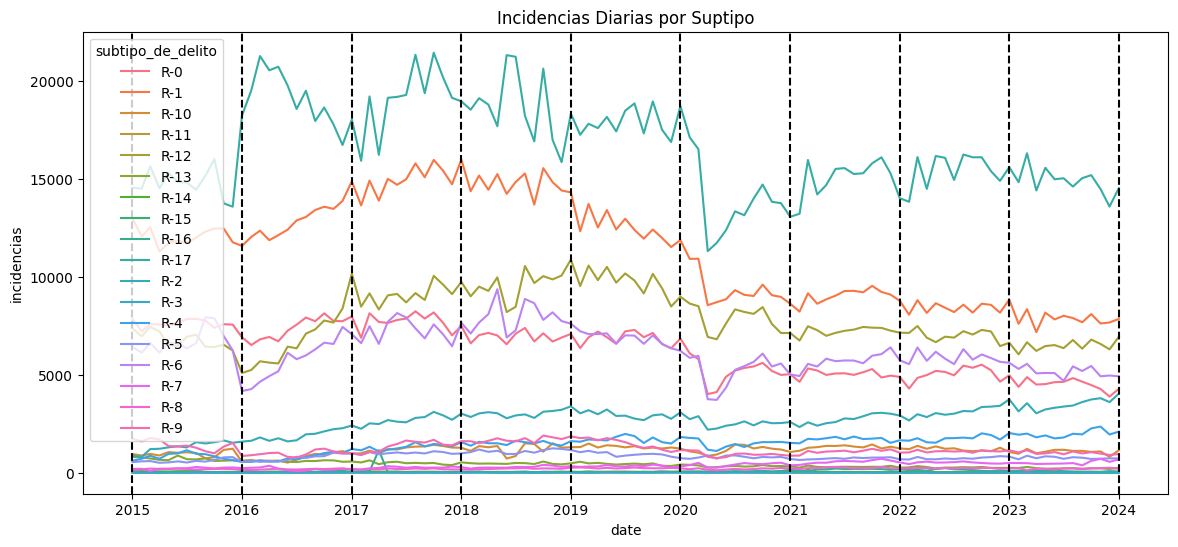

In [37]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=incidencias_diarias_tipo, x = 'date', y = 'incidencias', hue='subtipo_de_delito')
ax.set(title='Incidencias Diarias por Suptipo')
ticks = ax.get_xticks()

for xc in ticks[1:]:
    plt.axvline(x=xc, color='black', linestyle='--')

plt.show()

In [41]:
df.head()

,date,subtipo_de_delito,incidencias,codigo_lugar
0,2015-01-01,R-0,4,1001-1
1,2015-02-01,R-0,3,1001-1
2,2015-03-01,R-0,0,1001-1
3,2015-04-01,R-0,7,1001-1
4,2015-05-01,R-0,4,1001-1


In [43]:
df = df.sort_values('date').groupby(['codigo_lugar', 'subtipo_de_delito', 'date'], as_index=False).agg(
    incidencias = ('incidencias', 'mean'))
df.columns = ['cod_lugar', 'cod_subtipo','date','delitos']
df.set_index('date', inplace=True)
df.head()


,cod_lugar,cod_subtipo,delitos
date,,,
2015-01-01,10001-10,R-0,0.0
2015-02-01,10001-10,R-0,0.0
2015-03-01,10001-10,R-0,0.5
2015-04-01,10001-10,R-0,0.0
2015-05-01,10001-10,R-0,1.5


En este punto los datos están preparados para comenzar a modelar. Continuamos en la proxima notebook

In [44]:
#train = [] 
#test = []

#def split_train_test(group):
#    train_group = group.iloc[:-30]  
#    test_group = group.iloc[-30:]    
#    return train_group, test_group


#for group_name, group_data in df.groupby(['loc', 'subtipo']):
#    train_group, test_group = split_train_test(group_data)
#    train.append(train_group)
#    test.append(test_group)

#train = pd.concat(train)
#test = pd.concat(test)